In [1]:
from cyclic_scheduling import CyclicSchedulingProblem

# Introduction

All the following examples will be based on the problem defined at `problems/5tasks.yaml`. The example problem has been picked from the document of "Study of a NP-hard cyclic scheduling problem: The recurrent job-shop" by Claire Hanen.

In [2]:
c = CyclicSchedulingProblem.from_file('problems/5tasks.yaml')

Synchronous Dataflows (SDF) are a representation of computation. They are usually represented as a directed graph where each actor (node) represents a computation and each channel(arc) represents a data channel as in the following image.

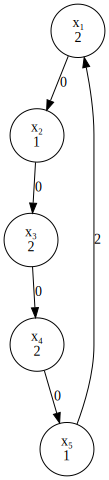

In [3]:
c

In the example, the actors are $x_1$, $x_2$, $x_3$, $x_4$, $x_5$ and the number within the node represents their execution time. Each channel are numbered with the number of tokens within them. When an actor fires, it consumes a token from its incoming channels and after its execution time, it produces a token to its outgoing channels. These dependencies in the firing of each actor can be captured with an inequality of the form:
$$
x(k) \ge y(k - l) + e_y
$$
per channel. The above example represents the dependency of the firing between the actor $x$ and $y$ implicated by the channel $y \rightarrow x$. In the inequality, $y(k)$ and $x(k)$ respetivelly represent the time at which $k$-th firing of $y$ and $x$ occurres. $e_y$ represents the execution time of $y$ and $l$ are the initial tokens of the channel $y \rightarrow x$. The inequality $x(k) \ge y(k - l) + e_y$ in short means "the $k$-th firing of $x$ happens after $(k-l)$-th firing of $y$ plus the execution time of y".

The systems of inequalities charatterizing the above SDF is:

In [4]:
c.system_of_inequalities()

x₂(k) ≥ 2 + x₁(k)
x₃(k) ≥ 1 + x₂(k)
x₄(k) ≥ 2 + x₃(k)
x₅(k) ≥ 2 + x₄(k)
x₁(k) ≥ 1 + x₅(k - 2)

And if the actor were to fire in a "as soon as possible fashion", then the execution of the SDF would be the following

In [5]:
c.solve_relaxation().plot()

CyclicSchedulingPlot(data='{"problem": {"actors": [{"name": "x\\u2081", "execution_time": 2, "processor": "pro…

## Cyclic Jobshop Problem

The cyclic jobshop problem is, given an SDF and a mapping of an actor to a processor, the problem of scheduling actors such that actors within the same processor do not overlap in execution and the cycle time is minimized.  

In the considered problem we will assume that $x_1$ and $x_3$ are in processor 1 and $x_2$, $x_4$ and $x_5$ are in processor 2. We can obtain the SDF of minimum runtime with the

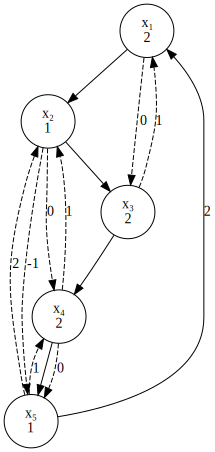

In [6]:
solution = c.solve()
solution

In [7]:
solution.plot()

CyclicSchedulingPlot(data='{"problem": {"actors": [{"name": "x\\u2081", "execution_time": 2, "processor": "pro…